## Monte Carlo Method: Calculating the area under the curve

## First integral 

**Task**: resolve the integral 

$\int_1^5 x^2 dx$

### Analytical method

We start by resolving this integral using the standard analytical method, assisted by the [SymPy symbolic mathematics library](https://sympy.org/). 

In [1]:
!pip install sympy

In [2]:
import sympy
from sympy.interactive import printing
printing.init_printing(use_latex="mathjax")

x = sympy.Symbol("x")
sympy.integrate(x**2, (x, 1, 5))

124/3

### Numerical Method

The expression we wish to integrate is very simple here, so calculating its integral analytically is easy (even without resorting to Python’s symbolic mathematics package!). In many cases, however, analytical approaches to integration are not feasible:

- the expression we wish to integrate is very complicated, possibly without a closed analytical integral
- it is only known in “black box” form (for instance a software module): we can evaluate it at various points but don’t know the corresponding equation

In such situations, stochastic simulation (“Monte Carlo”) methods allow us to generate an approximation of the integral, simply by evaluating the expression a large number of times at randomly selected points in the input space and counting the proportion that are less than the integrand at that point. The larger the number of simulations we run, the better the approximation (and note that computers are very very fast today, so on simple problems the simulation will run in a blink of an eye!). 

In [4]:
import numpy as np

N = 100_000
accum = 0
for i in range(N):
    x = np.random.uniform(1, 5)
    accum += x**2
measure = 5 - 1
measure * accum/float(N)

41.198070603911454

(array([1954., 2002., 2046., 2015., 2032., 1981., 1996., 1888., 2025.,
        2061.]),
 array([1.00011785, 1.40006123, 1.80000462, 2.19994801, 2.59989139,
        2.99983478, 3.39977816, 3.79972155, 4.19966493, 4.59960832,
        4.9995517 ]),
 <a list of 10 Patch objects>)

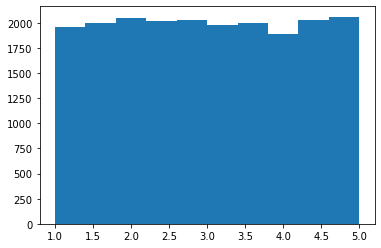

In [6]:
import matplotlib.pyplot as plt

x = np.random.uniform(1, 5, (20,1000))
plt.hist(np.ravel(x))

## Second integral

**Task**: resolve the integral $\int_3^2 x^2 + 4 x sin(x)$. 

### Analytical solution

In [ ]:
x = sympy.Symbol("x")
float(sympy.integrate(x**2 + 4 * x * sympy.sin(x), (x, 2, 3)))

### Stochastic solution

In [5]:
import numpy as np 

N = 100_000
accum = 0 
for i in range(N):
    x = numpy.random.uniform(2, 3)
    accum += x**2 + 4*x*np.sin(x)
measure = 3 - 2
measure * accum/float(N)

11.810682999524058

**Exercise**: now undertake the same comparison of analytical and stochastic simulation methods to evaluate the integral

$$\int_1^3 e^{x^2}$$

(Hint: the result should be approximately 1464.2)

## A 2D integral

Now we move to a 2D integral, $\int\int cos(x^4) + 3y^2 dx dy$ over $x ∈ [4,6]$ and $y ∈ [0, 1]$. 

Monte Carlo integration methods become increasingly attractive when compared to other numerical integration methods (such as quadrature) as the number of dimensions increases. 

Let’s examine the **analytical solution**, again thanks to sympy. 

In [ ]:
x = sympy.Symbol("x")
y = sympy.Symbol("y")
float(sympy.integrate(sympy.cos(x**4) + 3 * y**2, (x, 4, 6), (y, 0, 1)))

Now compare with **Monte Carlo estimation**:

In [ ]:
N = 100_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(4, 6)
    y = numpy.random.uniform(0, 1)
    accum += numpy.cos(x**4) + 3 * y * y 
measure = 2 * 1
measure * accum/float(N)

## Signal Detection Theory with ROC curve


In [229]:
## import necessary modules
import numpy as np
import scipy.stats as stats
#import statistics
import matplotlib.pyplot as plt

In [275]:
def calc_roc_curve(signalMean, noiseMean, variance):
    criterionList = np.linspace(-signalMean-3*np.sqrt(variance),signalMean+3*np.sqrt(variance),100)
    ## probability of correct rejection (pCR)
    ## probability of target hit (pHit)
    ## estimated dprime
    C = len(criterionList)
    pCR  = np.zeros(C)
    pHit = np.zeros(C)
    dPrimeEst = np.zeros(C)
    nTrials = 100
    for criterionNum, criterion in enumerate(criterionList):
        criterion = criterionList[criterionNum]
        ## randomly generate stimulation 0 (noise) or 1 (signal)
        stim = np.zeros(nTrials)
        stim[np.random.rand(nTrials) >0.5] = 1
        ## initialization of response and internal response
        resp = np.zeros(nTrials)
        internalResponse = np.zeros(nTrials)
        for t in range(nTrials):
            if stim[t] == 0: ## no signal, only noise
                internalResponse[t] = np.random.randn(1)*np.sqrt(variance)+noiseMean
            else: ## signal
                internalResponse[t] = np.random.randn(1)*np.sqrt(variance)+signalMean
            ## decide the response
            resp[t] = internalResponse[t] > criterion

        ## Actual (from simulation experiment) probability of correct Rejection
        pCR[criterionNum] = sum(np.logical_and(resp==0,stim==0))/sum(stim==0)
        pFA = 1 - pCR
        
        if pCR[criterionNum]==0.0 or pCR[criterionNum]==1.0:
            zCR = np.nan
        else:  ## Calculate z-score of Correct Rejection probability using inverted cumulative Gaussian
            #zCR = statistics.NormalDist().inv_cdf(pCR[criterionNum])
            zCR = stats.norm.ppf(pCR[criterionNum])

        ## Actual (from simulation experiment) probability of Hits 
        pHit[criterionNum] = sum(np.logical_and(resp==1,stim==1))/sum(stim==1)
        if pHit[criterionNum]==0.0 or pHit[criterionNum]==1.0:
            zHit = np.nan
        else: ## Calculate z-score of Correct Rejection probability using inverted cumulative Gaussian
            #zHit = statistics.NormalDist().inv_cdf(pHit[criterionNum])
            zHit = stats.norm.ppf(pHit[criterionNum])

        ## Actual (from simulation experiment) d' from simulation           
        dPrimeEst[criterionNum] =zCR + zHit
    return pFA, pHit, criterionList



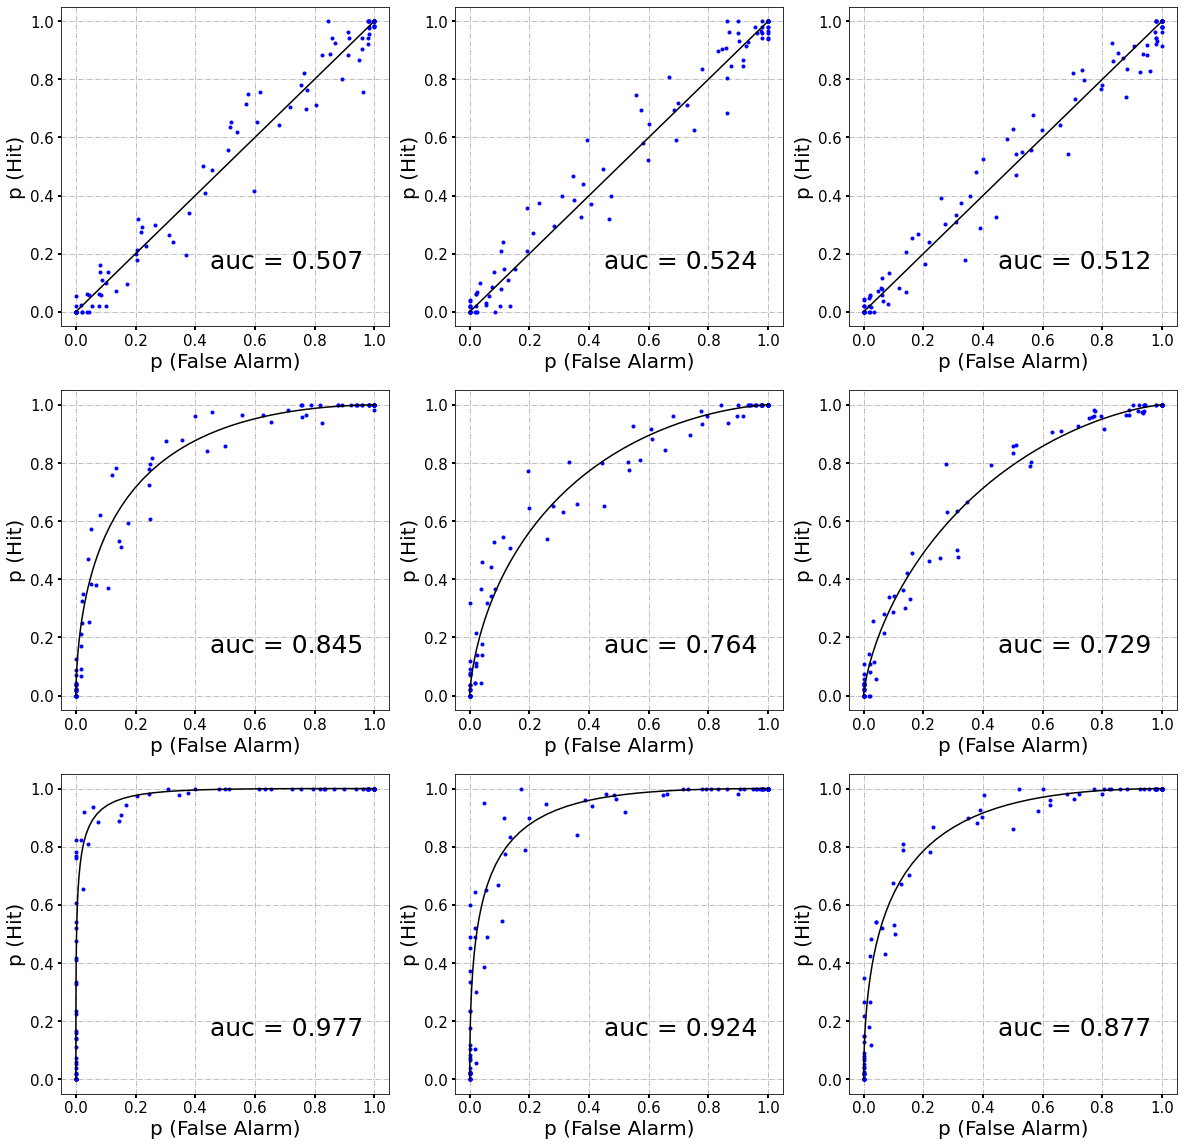

In [286]:
## Theoretical probability of Hits and False Alarm for criterionList
#pHitReal = np.array([1- statistics.NormalDist(signalMean, np.sqrt(variance)).cdf(c) for c in criterionList])
#pFAReal = np.array([1- statistics.NormalDist(noiseMean, np.sqrt(variance)).cdf(c) for c in criterionList])
noiseMean, variance = 0, 1
fig = plt.figure(figsize=(20,20))
for k, signalMean in enumerate(np.arange(3)):
    for m, variance in enumerate(np.arange(0.5,1.6,0.5)):
        pFA, pHit, criterionList = calc_roc_curve(signalMean, noiseMean, variance)
        ## Theoretical probability of Hits and False Alarm for criterionList
        pHitReal = np.array([1-stats.norm.cdf(c, signalMean, np.sqrt(variance)) for c in criterionList])
        pFAReal = np.array([1-stats.norm.cdf(c, noiseMean, np.sqrt(variance)) for c in criterionList])
    ## use np.trapz for calculation of area under ROC curve for the actual case
        area_under_curve = np.trapz(sorted(pHit),sorted(pFA))
        ax = fig.add_subplot(3,3,3*k+m+1)
        ax.plot(pFA, pHit, 'b.')
        ax.grid(True, linestyle='-.')
        ax.tick_params(labelcolor='k', labelsize=15, width=2)

    ## For theoretical ROC curve
        plt.plot(pFAReal, pHitReal, 'k')
        plt.xlabel('p (False Alarm)',fontsize=20)
        plt.ylabel('p (Hit)',fontsize=20)
        plt.text(0.45, 0.15, 'auc = {:04.3f}'.format(area_under_curve), size=25)


AttributeError: 'Figure' object has no attribute 'grid'

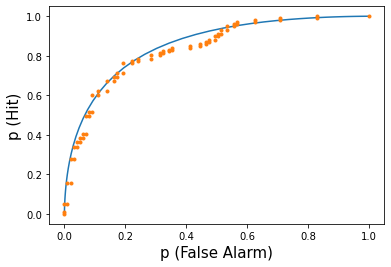

In [304]:
## Do the same thing with using modules from sklearn, metrics.roc_curve
from sklearn import metrics
nTrials = 200
stim = np.zeros(nTrials)
stim[np.random.rand(nTrials) >0.5] = 1
signalMean, noiseMean, variance = 1.5, 0, 1
## initialization of response and internal response
internalResponse = np.zeros(nTrials)
for t in range(nTrials):
    if stim[t] == 0: ## no signal, only noise
        internalResponse[t] = np.random.randn(1)*np.sqrt(variance)+noiseMean
    else: ## signal
        internalResponse[t] = np.random.randn(1)*np.sqrt(variance)+signalMean
fpr, tpr, thresholds = metrics.roc_curve(stim, internalResponse, pos_label=1)
pHitReal = np.array([1-stats.norm.cdf(c, signalMean, np.sqrt(variance)) for c in criterionList])
pFAReal = np.array([1-stats.norm.cdf(c, noiseMean, np.sqrt(variance)) for c in criterionList])
 
fig = plt.figure()
plt.plot(sorted(pFAReal),sorted(pHitReal))
plt.plot(fpr, tpr,'.')
## calcualte area under curve using the modules
area_under_curve2 = metrics.auc(sorted(fpr), sorted(tpr))
plt.xlabel('p (False Alarm)',fontsize=15)
plt.ylabel('p (Hit)',fontsize=15)
plt.text(0.45, 0.15, 'auc = {:04.3f}'.format(area_under_curve2), size=15)


<Figure size 432x288 with 0 Axes>

## Lecture05-Pandas1

### Transforming Data

In [6]:
import pandas as pd
import pickle

In [7]:
with open('homeless_data.pkl', 'rb') as f:
    homelessness = pickle.load(f)
with open('walmart_sales.pkl', 'rb') as f:
    sales = pickle.load(f)

#### Inspecting a DataFrame

In [8]:
# Print the head of the homelessness data
print(homelessness.head())

               region       state  individuals  family_members  state_pop
0  East South Central     Alabama       2570.0           864.0    4887681
1             Pacific      Alaska       1434.0           582.0     735139
2            Mountain     Arizona       7259.0          2606.0    7158024
3  West South Central    Arkansas       2280.0           432.0    3009733
4             Pacific  California     109008.0         20964.0   39461588


In [9]:
# Print information about homelessness
print(homelessness.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB
None


In [10]:
# Print the shape of homelessness
print(homelessness.shape)

(51, 5)


In [11]:
# Print a description of homelessness
print(homelessness.describe())

         individuals  family_members     state_pop
count      51.000000       51.000000  5.100000e+01
mean     7225.784314     3504.882353  6.405637e+06
std     15991.025083     7805.411811  7.327258e+06
min       434.000000       75.000000  5.776010e+05
25%      1446.500000      592.000000  1.777414e+06
50%      3082.000000     1482.000000  4.461153e+06
75%      6781.500000     3196.000000  7.340946e+06
max    109008.000000    52070.000000  3.946159e+07


In [12]:
# Print the values of homelessness
print(homelessness.values)

[['East South Central' 'Alabama' 2570.0 864.0 4887681]
 ['Pacific' 'Alaska' 1434.0 582.0 735139]
 ['Mountain' 'Arizona' 7259.0 2606.0 7158024]
 ['West South Central' 'Arkansas' 2280.0 432.0 3009733]
 ['Pacific' 'California' 109008.0 20964.0 39461588]
 ['Mountain' 'Colorado' 7607.0 3250.0 5691287]
 ['New England' 'Connecticut' 2280.0 1696.0 3571520]
 ['South Atlantic' 'Delaware' 708.0 374.0 965479]
 ['South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 ['South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 ['South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 ['Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 ['Mountain' 'Idaho' 1297.0 715.0 1750536]
 ['East North Central' 'Illinois' 6752.0 3891.0 12723071]
 ['East North Central' 'Indiana' 3776.0 1482.0 6695497]
 ['West North Central' 'Iowa' 1711.0 1038.0 3148618]
 ['West North Central' 'Kansas' 1443.0 773.0 2911359]
 ['East South Central' 'Kentucky' 2735.0 953.0 4461153]
 ['West South Central' 'Louisiana' 2540.0 519.0 4659690]
 ['New 

In [13]:
# Print the column index of homelessness
print(homelessness.columns)0.0
00.0

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')


In [314]:
#. Print the row index of homelessness
print(homelessness.index)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
            50],
           dtype='int64')


In [315]:
## Sorting rows
# Sort homelessness by individual
homelessness_ind = homelessness.sort_values('individuals')

In [316]:
# Print the top few rows
print(homelessness_ind.head())

                region         state  individuals  family_members  state_pop
50            Mountain       Wyoming        434.0           205.0     577601
34  West North Central  North Dakota        467.0            75.0     758080
7       South Atlantic      Delaware        708.0           374.0     965479
39         New England  Rhode Island        747.0           354.0    1058287
45         New England       Vermont        780.0           511.0     624358


In [318]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values('family_members',ascending=False)

In [319]:
# Print the top few rows
print(homelessness_fam.head())

                region          state  individuals  family_members  state_pop
32        Mid-Atlantic       New York      39827.0         52070.0   19530351
4              Pacific     California     109008.0         20964.0   39461588
21         New England  Massachusetts       6811.0         13257.0    6882635
9       South Atlantic        Florida      21443.0          9587.0   21244317
43  West South Central          Texas      19199.0          6111.0   28628666


In [320]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region', 'family_members'],ascending = [True, False])

In [321]:
# Print the top few rows
print(homelessness_reg_fam.head())

                region      state  individuals  family_members  state_pop
13  East North Central   Illinois       6752.0          3891.0   12723071
35  East North Central       Ohio       6929.0          3320.0   11676341
22  East North Central   Michigan       5209.0          3142.0    9984072
49  East North Central  Wisconsin       2740.0          2167.0    5807406
14  East North Central    Indiana       3776.0          1482.0    6695497


#### Subsetting columns

In [322]:
# Select the individuals column
individuals = homelessness['individuals']

# Print the head of the result
print(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64


In [323]:
## different indexing
homelessness.individuals

0       2570.0
1       1434.0
2       7259.0
3       2280.0
4     109008.0
5       7607.0
6       2280.0
7        708.0
8       3770.0
9      21443.0
10      6943.0
11      4131.0
12      1297.0
13      6752.0
14      3776.0
15      1711.0
16      1443.0
17      2735.0
18      2540.0
19      1450.0
20      4914.0
21      6811.0
22      5209.0
23      3993.0
24      1024.0
25      3776.0
26       983.0
27      1745.0
28      7058.0
29       835.0
30      6048.0
31      1949.0
32     39827.0
33      6451.0
34       467.0
35      6929.0
36      2823.0
37     11139.0
38      8163.0
39       747.0
40      3082.0
41       836.0
42      6139.0
43     19199.0
44      1904.0
45       780.0
46      3928.0
47     16424.0
48      1021.0
49      2740.0
50       434.0
Name: individuals, dtype: float64

In [14]:
# Select the state and family_members columns
state_fam = homelessness[['state','family_members']]

# Print the head of the result
print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


In [15]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals','state']]

# Print the head of the result
print(ind_state.head())

   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


#### Subsetting rows

In [16]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals']>10000]

# See the result
print(ind_gt_10k)

                region       state  individuals  family_members  state_pop
4              Pacific  California     109008.0         20964.0   39461588
9       South Atlantic     Florida      21443.0          9587.0   21244317
32        Mid-Atlantic    New York      39827.0         52070.0   19530351
37             Pacific      Oregon      11139.0          3337.0    4181886
43  West South Central       Texas      19199.0          6111.0   28628666
47             Pacific  Washington      16424.0          5880.0    7523869


In [18]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region']=='Mountain']

# See the result
print(mountain_reg)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
5   Mountain    Colorado       7607.0          3250.0    5691287
12  Mountain       Idaho       1297.0           715.0    1750536
26  Mountain     Montana        983.0           422.0    1060665
28  Mountain      Nevada       7058.0           486.0    3027341
31  Mountain  New Mexico       1949.0           602.0    2092741
44  Mountain        Utah       1904.0           972.0    3153550
50  Mountain     Wyoming        434.0           205.0     577601


In [19]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members']<1000) & (homelessness['region']=='Pacific')]

# See the result
print(fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska       1434.0           582.0     735139


#### Subsetting rows by categorical variables


In [20]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[homelessness['region'].isin(['South Atlantic', 'Mid-Atlantic'])]

# See the result
print(south_mid_atlantic)

            region                 state  individuals  family_members  \
7   South Atlantic              Delaware        708.0           374.0   
8   South Atlantic  District of Columbia       3770.0          3134.0   
9   South Atlantic               Florida      21443.0          9587.0   
10  South Atlantic               Georgia       6943.0          2556.0   
20  South Atlantic              Maryland       4914.0          2230.0   
30    Mid-Atlantic            New Jersey       6048.0          3350.0   
32    Mid-Atlantic              New York      39827.0         52070.0   
33  South Atlantic        North Carolina       6451.0          2817.0   
38    Mid-Atlantic          Pennsylvania       8163.0          5349.0   
40  South Atlantic        South Carolina       3082.0           851.0   
46  South Atlantic              Virginia       3928.0          2047.0   
48  South Atlantic         West Virginia       1021.0           222.0   

    state_pop  
7      965479  
8      701547  
9 

In [21]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

In [22]:

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness['state'].isin(canu)]

# See the result
print(mojave_homelessness)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
4    Pacific  California     109008.0         20964.0   39461588
28  Mountain      Nevada       7058.0           486.0    3027341
44  Mountain        Utah       1904.0           972.0    3153550


#### Adding new columns


In [51]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

In [43]:
homelessness.total = homelessness.individuals + homelessness.family_members

<ipython-input-43-9b81e1aaf6aa>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  homelessness.total = homelessness.individuals + homelessness.family_members


In [45]:
homelessness.head()

,region,state,individuals,family_members,state_pop,total
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0
1,Pacific,Alaska,1434.0,582.0,735139,2016.0
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0
4,Pacific,California,109008.0,20964.0,39461588,129972.0


In [46]:
homelessness = homelessness.drop('total', axis=1)
print(homelessness)

                region                 state  individuals  family_members  \
0   East South Central               Alabama       2570.0           864.0   
1              Pacific                Alaska       1434.0           582.0   
2             Mountain               Arizona       7259.0          2606.0   
3   West South Central              Arkansas       2280.0           432.0   
4              Pacific            California     109008.0         20964.0   
5             Mountain              Colorado       7607.0          3250.0   
6          New England           Connecticut       2280.0          1696.0   
7       South Atlantic              Delaware        708.0           374.0   
8       South Atlantic  District of Columbia       3770.0          3134.0   
9       South Atlantic               Florida      21443.0          9587.0   
10      South Atlantic               Georgia       6943.0          2556.0   
11             Pacific                Hawaii       4131.0          2399.0   

In [52]:
# Add p_individuals col as proportion of individuals
homelessness['p_individuals'] = homelessness['individuals']/homelessness['total']

In [53]:
# See the result
print(homelessness)

                region                 state  individuals  family_members  \
0   East South Central               Alabama       2570.0           864.0   
1              Pacific                Alaska       1434.0           582.0   
2             Mountain               Arizona       7259.0          2606.0   
3   West South Central              Arkansas       2280.0           432.0   
4              Pacific            California     109008.0         20964.0   
5             Mountain              Colorado       7607.0          3250.0   
6          New England           Connecticut       2280.0          1696.0   
7       South Atlantic              Delaware        708.0           374.0   
8       South Atlantic  District of Columbia       3770.0          3134.0   
9       South Atlantic               Florida      21443.0          9587.0   
10      South Atlantic               Georgia       6943.0          2556.0   
11             Pacific                Hawaii       4131.0          2399.0   

In [54]:
## Wrapping up
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness['individuals'] / homelessness['state_pop'] 

In [55]:
# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k']>20]

In [56]:
# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)

In [57]:
# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state','indiv_per_10k']]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


### Aggregating Data

In [58]:
# Print the head of the sales DataFrame
print(sales.head())

   store type  department       date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1 2010-02-05      24924.50       False       5.727778   
1      1    A           2 2010-02-05      50605.27       False       5.727778   
2      1    A           3 2010-02-05      13740.12       False       5.727778   
3      1    A           4 2010-02-05      39954.04       False       5.727778   
4      1    A           5 2010-02-05      32229.38       False       5.727778   

   fuel_price_usd_per_l  unemployment  
0              0.679451         8.106  
1              0.679451         8.106  
2              0.679451         8.106  
3              0.679451         8.106  
4              0.679451         8.106  


In [59]:
# Print the info about the sales DataFrame
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413119 entries, 0 to 413118
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   store                 413119 non-null  int64         
 1   type                  413119 non-null  object        
 2   department            413119 non-null  int32         
 3   date                  413119 non-null  datetime64[ns]
 4   weekly_sales          413119 non-null  float64       
 5   is_holiday            413119 non-null  bool          
 6   temperature_c         413119 non-null  float64       
 7   fuel_price_usd_per_l  413119 non-null  float64       
 8   unemployment          413119 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 27.2+ MB
None


In [60]:
# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

16094.726811185497


In [61]:
# Print the median of weekly_sales
print(sales['weekly_sales'].median())

7682.47


In [62]:
# Print the maximum of the date column
print(sales['date'].max())

2012-10-26 00:00:00


In [63]:
# Print the minimum of the date column
print(sales['date'].min())

2010-02-05 00:00:00


In [64]:
## Efficient summaries : usage of .agg() method
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

In [65]:
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

15.299999999999994


#### Dropping duplicates and Counting categorical variables


In [66]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types.head())

       store type  department       date  weekly_sales  is_holiday  \
0          1    A           1 2010-02-05      24924.50       False   
10244      2    A           1 2010-02-05      35034.06       False   
20482      3    B           1 2010-02-05       6453.58       False   
29518      4    A           1 2010-02-05      38724.42       False   
39790      5    B           1 2010-02-05       9323.89       False   

       temperature_c  fuel_price_usd_per_l  unemployment  
0           5.727778              0.679451         8.106  
10244       4.550000              0.679451         8.324  
20482       7.616667              0.679451         7.368  
29518       6.533333              0.686319         8.623  
39790       4.277778              0.679451         6.566  


In [74]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

A    22
B    17
C     6
Name: type, dtype: int64


In [75]:
# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

A    0.488889
B    0.377778
C    0.133333
Name: type, dtype: float64


In [76]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
print(store_depts.head())


   store type  department       date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1 2010-02-05      24924.50       False       5.727778   
1      1    A           2 2010-02-05      50605.27       False       5.727778   
2      1    A           3 2010-02-05      13740.12       False       5.727778   
3      1    A           4 2010-02-05      39954.04       False       5.727778   
4      1    A           5 2010-02-05      32229.38       False       5.727778   

   fuel_price_usd_per_l  unemployment  
0              0.679451         8.106  
1              0.679451         8.106  
2              0.679451         8.106  
3              0.679451         8.106  
4              0.679451         8.106  


In [80]:
# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(ascending=False)
print(dept_counts_sorted)

1     45
9     45
4     45
6     45
8     45
      ..
37    20
50    14
43     5
39     5
65     1
Name: department, Length: 81, dtype: int64


In [81]:
# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

1     0.013778
9     0.013778
4     0.013778
6     0.013778
8     0.013778
        ...   
37    0.006124
50    0.004287
43    0.001531
39    0.001531
65    0.000306
Name: department, Length: 81, dtype: float64


In [82]:
# Subset the rows that are holiday weeks and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")

In [83]:
# Print date col of holiday_dates
print(holiday_dates["date"])

73     2010-02-12
2218   2010-09-10
3014   2010-11-26
3372   2010-12-31
3800   2011-02-11
5940   2011-09-09
6731   2011-11-25
7096   2011-12-30
7527   2012-02-10
9667   2012-09-07
Name: date, dtype: datetime64[ns]


#### What percent of sales occurred at each store type?

In [84]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

In [85]:
# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

In [86]:
# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

In [87]:
# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

In [88]:
# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.65137469 0.28763851 0.0609868 ]


In [89]:
## Better solution using .groupby()
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

In [90]:
# Get proportion for each type
sales_propn_by_type = sales_by_type/sales_by_type.sum()

print(sales_propn_by_type)

type
A    0.651375
B    0.287639
C    0.060987
Name: weekly_sales, dtype: float64


In [91]:
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

In [96]:
# Group by type and is_holiday; calc total weekly sales
sales_propn_by_type_is_holiday = sales.groupby(['type','is_holiday'])['weekly_sales'].sum()/sales_by_type.sum()
print(sales_propn_by_type_is_holiday)

type  is_holiday
A     False         0.602736
      True          0.048639
B     False         0.265514
      True          0.022125
C     False         0.056737
      True          0.004250
Name: weekly_sales, dtype: float64


In [97]:
# Import NumPy with the alias np
import numpy as np

In [99]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([min, max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

          min        max          mean    median
type                                            
A    -4988.94  474330.10  20099.568043  10105.17
B    -3924.00  693099.36  12335.331875   6269.02
C     -379.00  112152.35   9519.532538   1149.67


In [100]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

     unemployment                          fuel_price_usd_per_l            \
             amin    amax      mean median                 amin      amax   
type                                                                        
A           3.879  14.313  7.791595  7.818             0.653034  1.180321   
B           4.125  14.313  7.889666  7.806             0.664129  1.180321   
C           5.217  14.313  8.934350  8.300             0.664129  1.180321   

                          
          mean    median  
type                      
A     0.883391  0.902676  
B     0.892997  0.922225  
C     0.888848  0.902676  


In [101]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min, np.max, np.mean, np.median])
sales.pivot_table(values='weekly_sales', index='type', aggfunc=[np.min, np.max, np.mean, np.median], fill_value = 0, margins=True)

# Print sales_stats
print(sales_stats)

         amin       amax          mean    median
type                                            
A    -4988.94  474330.10  20099.568043  10105.17
B    -3924.00  693099.36  12335.331875   6269.02
C     -379.00  112152.35   9519.532538   1149.67


In [102]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg([np.min, np.max, np.mean, np.median])
sales.pivot_table(values=['unemployment', 'fuel_price_usd_per_l'], index = 'type', aggfunc=[np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

     unemployment                          fuel_price_usd_per_l            \
             amin    amax      mean median                 amin      amax   
type                                                                        
A           3.879  14.313  7.791595  7.818             0.653034  1.180321   
B           4.125  14.313  7.889666  7.806             0.664129  1.180321   
C           5.217  14.313  8.934350  8.300             0.664129  1.180321   

                          
          mean    median  
type                      
A     0.883391  0.902676  
B     0.892997  0.922225  
C     0.888848  0.902676  


In [103]:
unemp_fuel_stats_is_holyday = sales.groupby(["type",'is_holiday'])[["unemployment", "fuel_price_usd_per_l"]].agg([np.min, np.max, np.mean, np.median])
sales.pivot_table(values=['unemployment', 'fuel_price_usd_per_l'], index = 'type', columns='is_holiday', aggfunc=[np.min, np.max, np.mean, np.median])

print(unemp_fuel_stats_is_holyday)

                unemployment                          fuel_price_usd_per_l  \
                        amin    amax      mean median                 amin   
type is_holiday                                                              
A    False             3.879  14.313  7.786215  7.808             0.653034   
     True              4.077  14.313  7.862558  7.850             0.663865   
B    False             4.125  14.313  7.884498  7.806             0.664129   
     True              4.156  14.313  7.957910  7.852             0.673111   
C    False             5.217  14.313  8.926488  8.300             0.664129   
     True              5.407  14.313  9.039471  8.324             0.673111   

                                               
                     amax      mean    median  
type is_holiday                                
A    False       1.180321  0.885958  0.911922  
     True        1.089446  0.849535  0.839803  
B    False       1.180321  0.895612  0.927244  
     True

### Slicing and Indexing

In [104]:
## https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

temperatures= pd.read_csv('temperature.csv')
temperatures.head()

C:\Users\hewas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,10,Africa,Algeria,NaN,Algiers,1,11,1995,51.7
2,20,Africa,Algeria,NaN,Algiers,1,21,1995,54.2
3,30,Africa,Algeria,NaN,Algiers,1,31,1995,56.9
4,40,Africa,Algeria,NaN,Algiers,2,10,1995,59.0


In [105]:
# Index temperatures by city
temperatures_ind = temperatures.set_index('City')

# Look at temperatures_ind
print(temperatures_ind)


                      Unnamed: 0         Region  Country  \
City                                                       
Algiers                        0         Africa  Algeria   
Algiers                       10         Africa  Algeria   
Algiers                       20         Africa  Algeria   
Algiers                       30         Africa  Algeria   
Algiers                       40         Africa  Algeria   
...                          ...            ...      ...   
San Juan Puerto Rico     2906280  North America       US   
San Juan Puerto Rico     2906290  North America       US   
San Juan Puerto Rico     2906300  North America       US   
San Juan Puerto Rico     2906310  North America       US   
San Juan Puerto Rico     2906320  North America       US   

                                       State  Month  Day  Year  AvgTemperature  
City                                                                            
Algiers                                  NaN      1    1 

In [108]:
# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

                        City  Unnamed: 0         Region  Country  \
0                    Algiers           0         Africa  Algeria   
1                    Algiers          10         Africa  Algeria   
2                    Algiers          20         Africa  Algeria   
3                    Algiers          30         Africa  Algeria   
4                    Algiers          40         Africa  Algeria   
...                      ...         ...            ...      ...   
290628  San Juan Puerto Rico     2906280  North America       US   
290629  San Juan Puerto Rico     2906290  North America       US   
290630  San Juan Puerto Rico     2906300  North America       US   
290631  San Juan Puerto Rico     2906310  North America       US   
290632  San Juan Puerto Rico     2906320  North America       US   

                         State  Month  Day  Year  AvgTemperature  
0                          NaN      1    1  1995            64.2  
1                          NaN      1   11  1995 

In [109]:
## Subsetting with .loc[]
# Make a list of cities, "Seoul","Chicago", " Osaka"
cities = ["Seoul","Chicago", "Osaka"]

In [110]:
# Subset temperatures using square brackets
print(temperatures[temperatures["City"].isin(cities)])

        Unnamed: 0         Region Country     State     City  Month  Day  \
35886       358860           Asia   Japan       NaN    Osaka      1   10   
35887       358870           Asia   Japan       NaN    Osaka      1   20   
35888       358880           Asia   Japan       NaN    Osaka      1   30   
35889       358890           Asia   Japan       NaN    Osaka      2    9   
35890       358900           Asia   Japan       NaN    Osaka      2   19   
...            ...            ...     ...       ...      ...    ...  ...   
184100     1841000  North America      US  Illinois  Chicago      3   29   
184101     1841010  North America      US  Illinois  Chicago      4    8   
184102     1841020  North America      US  Illinois  Chicago      4   18   
184103     1841030  North America      US  Illinois  Chicago      4   28   
184104     1841040  North America      US  Illinois  Chicago      5    8   

        Year  AvgTemperature  
35886   1995            40.2  
35887   1995            4

In [112]:
# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0 Region      Country State  Month  Day  Year  AvgTemperature
City                                                                         
Seoul      496780   Asia  South Korea   NaN      1   10  1995            20.3
Seoul      496790   Asia  South Korea   NaN      1   20  1995            30.5
Seoul      496800   Asia  South Korea   NaN      1   30  1995            18.6
Seoul      496810   Asia  South Korea   NaN      2    9  1995            30.5
Seoul      496820   Asia  South Korea   NaN      2   19  1995            35.2
...           ...    ...          ...   ...    ...  ...   ...             ...
Osaka      368070   Asia        Japan   NaN      3   28  2020            51.6
Osaka      368080   Asia        Japan   NaN      4    7  2020            56.5
Osaka      368090   Asia        Japan   NaN      4   17  2020            63.6
Osaka      368100   Asia        Japan   NaN      4   27  2020            61.0
Osaka      368110   Asia        Japan   NaN      5    7  2020   

In [113]:
temperatures_ind.index

Index(['Algiers', 'Algiers', 'Algiers', 'Algiers', 'Algiers', 'Algiers',
       'Algiers', 'Algiers', 'Algiers', 'Algiers',
       ...
       'San Juan Puerto Rico', 'San Juan Puerto Rico', 'San Juan Puerto Rico',
       'San Juan Puerto Rico', 'San Juan Puerto Rico', 'San Juan Puerto Rico',
       'San Juan Puerto Rico', 'San Juan Puerto Rico', 'San Juan Puerto Rico',
       'San Juan Puerto Rico'],
      dtype='object', name='City', length=290633)

In [114]:
## Subsetting with .loc[]
# Make a list of cities, Seoul, Chicago, Osaka
cities = ["Seoul", "Chicago", "Osaka"]

In [115]:
# Subset temperatures using square brackets
print(temperatures[temperatures["City"].isin(cities)])

        Unnamed: 0         Region Country     State     City  Month  Day  \
35886       358860           Asia   Japan       NaN    Osaka      1   10   
35887       358870           Asia   Japan       NaN    Osaka      1   20   
35888       358880           Asia   Japan       NaN    Osaka      1   30   
35889       358890           Asia   Japan       NaN    Osaka      2    9   
35890       358900           Asia   Japan       NaN    Osaka      2   19   
...            ...            ...     ...       ...      ...    ...  ...   
184100     1841000  North America      US  Illinois  Chicago      3   29   
184101     1841010  North America      US  Illinois  Chicago      4    8   
184102     1841020  North America      US  Illinois  Chicago      4   18   
184103     1841030  North America      US  Illinois  Chicago      4   28   
184104     1841040  North America      US  Illinois  Chicago      5    8   

        Year  AvgTemperature  
35886   1995            40.2  
35887   1995            4

In [116]:
# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0 Region      Country State  Month  Day  Year  AvgTemperature
City                                                                         
Seoul      496780   Asia  South Korea   NaN      1   10  1995            20.3
Seoul      496790   Asia  South Korea   NaN      1   20  1995            30.5
Seoul      496800   Asia  South Korea   NaN      1   30  1995            18.6
Seoul      496810   Asia  South Korea   NaN      2    9  1995            30.5
Seoul      496820   Asia  South Korea   NaN      2   19  1995            35.2
...           ...    ...          ...   ...    ...  ...   ...             ...
Osaka      368070   Asia        Japan   NaN      3   28  2020            51.6
Osaka      368080   Asia        Japan   NaN      4    7  2020            56.5
Osaka      368090   Asia        Japan   NaN      4   17  2020            63.6
Osaka      368100   Asia        Japan   NaN      4   27  2020            61.0
Osaka      368110   Asia        Japan   NaN      5    7  2020   

In [117]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['Country','City'])

In [118]:
# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [('US', 'Los Angeles'),('Japan','Osaka')]

In [119]:
# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                     Unnamed: 0         Region       State  Month  Day  Year  \
Country City                                                                   
US      Los Angeles     1570130  North America  California      1    7  1995   
        Los Angeles     1570140  North America  California      1   17  1995   
        Los Angeles     1570150  North America  California      1   27  1995   
        Los Angeles     1570160  North America  California      2    6  1995   
        Los Angeles     1570170  North America  California      2   16  1995   
...                         ...            ...         ...    ...  ...   ...   
Japan   Osaka            368070           Asia         NaN      3   28  2020   
        Osaka            368080           Asia         NaN      4    7  2020   
        Osaka            368090           Asia         NaN      4   17  2020   
        Osaka            368100           Asia         NaN      4   27  2020   
        Osaka            368110         

In [120]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

                Unnamed: 0  Region State  Month  Day  Year  AvgTemperature
Country City                                                              
Albania Tirana      623380  Europe   NaN      1    4  1995           -99.0
        Tirana      623390  Europe   NaN      1   14  1995           -99.0
        Tirana      623400  Europe   NaN      1   24  1995           -99.0
        Tirana      623410  Europe   NaN      2    3  1995           -99.0
        Tirana      623420  Europe   NaN      2   13  1995           -99.0
...                    ...     ...   ...    ...  ...   ...             ...
Zambia  Lusaka      251070  Africa   NaN     12    6  2013            70.8
        Lusaka      251080  Africa   NaN     12   16  2013           -99.0
        Lusaka      251090  Africa   NaN     12   26  2013            75.2
        Lusaka      251100  Africa   NaN      1    5  2014            74.5
        Lusaka      251110  Africa   NaN      1   15  2014            70.2

[290633 rows x 7 columns

In [121]:
# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="City"))

                     Unnamed: 0  Region State  Month  Day  Year  \
Country     City                                                  
Ivory Coast Abidjan       96500  Africa   NaN      1    2  1995   
            Abidjan       96510  Africa   NaN      1   12  1995   
            Abidjan       96520  Africa   NaN      1   22  1995   
            Abidjan       96530  Africa   NaN      2    1  1995   
            Abidjan       96540  Africa   NaN      2   11  1995   
...                         ...     ...   ...    ...  ...   ...   
Switzerland Zurich       968260  Europe   NaN      4    1  2020   
            Zurich       968270  Europe   NaN      4   11  2020   
            Zurich       968280  Europe   NaN      4   21  2020   
            Zurich       968290  Europe   NaN      5    1  2020   
            Zurich       968300  Europe   NaN      5   11  2020   

                     AvgTemperature  
Country     City                     
Ivory Coast Abidjan            82.3  
            Ab

In [122]:
# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["Country", "City"], ascending = [True, False]))

                Unnamed: 0  Region State  Month  Day  Year  AvgTemperature
Country City                                                              
Albania Tirana      623380  Europe   NaN      1    4  1995           -99.0
        Tirana      623390  Europe   NaN      1   14  1995           -99.0
        Tirana      623400  Europe   NaN      1   24  1995           -99.0
        Tirana      623410  Europe   NaN      2    3  1995           -99.0
        Tirana      623420  Europe   NaN      2   13  1995           -99.0
...                    ...     ...   ...    ...  ...   ...             ...
Zambia  Lusaka      251070  Africa   NaN     12    6  2013            70.8
        Lusaka      251080  Africa   NaN     12   16  2013           -99.0
        Lusaka      251090  Africa   NaN     12   26  2013            75.2
        Lusaka      251100  Africa   NaN      1    5  2014            74.5
        Lusaka      251110  Africa   NaN      1   15  2014            70.2

[290633 rows x 7 columns

In [123]:
## Slicing index values
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

In [124]:
# Subset rows from Pakistan to Russia
print(temperatures_srt.loc['Pakistan':'Russia'])

                    Unnamed: 0  Region State  Month  Day  Year  AvgTemperature
Country  City                                                                 
Pakistan Islamabad      459710    Asia   NaN      1    2  1995            49.2
         Islamabad      459720    Asia   NaN      1   12  1995            48.1
         Islamabad      459730    Asia   NaN      1   22  1995            47.9
         Islamabad      459740    Asia   NaN      2    1  1995            51.6
         Islamabad      459750    Asia   NaN      2   11  1995            53.9
...                        ...     ...   ...    ...  ...   ...             ...
Russia   Yerevan        890700  Europe   NaN      9   14  2003            70.3
         Yerevan        890710  Europe   NaN      9   24  2003            65.1
         Yerevan        890720  Europe   NaN     10    4  2003           -99.0
         Yerevan        890730  Europe   NaN     10   14  2003            63.2
         Yerevan        890740  Europe   NaN     10 

In [125]:
# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc['Lahore':'Moscow'])

                   Unnamed: 0  Region State  Month  Day  Year  AvgTemperature
Country City                                                                 
Laos    Vientiane      404120    Asia   NaN      1    7  1995            70.2
        Vientiane      404130    Asia   NaN      1   17  1995            72.7
        Vientiane      404140    Asia   NaN      1   27  1995            78.8
        Vientiane      404150    Asia   NaN      2    6  1995            68.5
        Vientiane      404160    Asia   NaN      2   16  1995            81.9
...                       ...     ...   ...    ...  ...   ...             ...
Morocco Rabat          123190  Africa   NaN      4    3  2020            57.8
        Rabat          123200  Africa   NaN      4   13  2020            61.7
        Rabat          123210  Africa   NaN      4   23  2020            58.6
        Rabat          123220  Africa   NaN      5    3  2020            81.0
        Rabat          123230  Africa   NaN      5   13  2020   

In [126]:
# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[('Pakistan','Lahore'):('Russia','Moscow')])

                     Unnamed: 0                             Region State  \
Country City                                                               
Panama  Panama City     1406300  South/Central America & Carribean   NaN   
        Panama City     1406310  South/Central America & Carribean   NaN   
        Panama City     1406320  South/Central America & Carribean   NaN   
        Panama City     1406330  South/Central America & Carribean   NaN   
        Panama City     1406340  South/Central America & Carribean   NaN   
...                         ...                                ...   ...   
Russia  Moscow           887480                             Europe   NaN   
        Moscow           887490                             Europe   NaN   
        Moscow           887500                             Europe   NaN   
        Moscow           887510                             Europe   NaN   
        Moscow           887520                             Europe   NaN   

           

In [ ]:
## Slicing in both directions
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[('India', 'Hyderabad'):('Iraq','Baghdad')])

In [127]:
# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:, 'Year':'AvgTemperature'])

                Year  AvgTemperature
Country City                        
Albania Tirana  1995           -99.0
        Tirana  1995           -99.0
        Tirana  1995           -99.0
        Tirana  1995           -99.0
        Tirana  1995           -99.0
...              ...             ...
Zambia  Lusaka  2013            70.8
        Lusaka  2013           -99.0
        Lusaka  2013            75.2
        Lusaka  2014            74.5
        Lusaka  2014            70.2

[290633 rows x 2 columns]


In [128]:
# Subset in both directions at once
print(temperatures_srt.loc[('India', 'Hyderabad'):('Iraq','Baghdad'), 'Year':'AvgTemperature'])

                   Year  AvgTemperature
Country   City                         
Indonesia Jakarta  1995            80.6
          Jakarta  1995            79.0
          Jakarta  1995            80.6
          Jakarta  1995            79.7
          Jakarta  1995            81.7
...                 ...             ...
          Jakarta  2020            85.4
          Jakarta  2020            84.8
          Jakarta  2020            86.9
          Jakarta  2020            81.4
          Jakarta  2020            86.9

[927 rows x 2 columns]


#### Slicing time series


In [129]:
# Add a colum to temperature named date in format of yy-mm-dd
temperatures['date'] = pd.to_datetime(temperatures[['Year','Month','Day']][:10000])


In [ ]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures['date'] >= '2010-01-01') & (temperatures['date'] <= '2011-12-31')]
print(temperatures_bool)


In [ ]:
# Set date as an index
temperatures_ind = temperatures.set_index('date')

In [ ]:
# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010':'2011',:])

In [ ]:
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-08-01':'2011-02-28'])

In [ ]:
temp_by_country_city_vs_year = temperatures.pivot_table(values='AvgTemperature', 
                                                        index=['Country', 'City'], 
                                                        columns = 'Year',fill_value=0)

# See the result
print(temp_by_country_city_vs_year)

In [ ]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt':'India']

In [ ]:
# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi')]

In [ ]:
# Subset in both directions at once
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi'),'2005':'2010']


In [ ]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

In [ ]:
# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year==mean_temp_by_year.max()])

In [ ]:
# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis='columns')

In [ ]:
# Find the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

## Visualization

In [ ]:
## Which avocado size is most popular?
with open('avoplotto.pkl', 'rb') as f:
    avocados = pickle.load(f)

In [ ]:
# Look at the first few rows of data
avocados.head()

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt


In [ ]:
# Look at the first few rows of data
print(avocados.head())

In [ ]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

In [ ]:
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

In [ ]:
## Changes in sales over time

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()


In [ ]:
# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(x='date')

# Show the plot
plt.show()

In [ ]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

In [ ]:
# Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist()

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

In [ ]:
avocados.head()

In [ ]:
## Finding missing values

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
avocados_2015 = avocados[avocados['year']==2015]
print(avocados_2015.isna().sum())

In [ ]:
# Check each column for missing values
print(avocados_2015.isna().any())

In [ ]:
# Bar plot of missing values by variable
avocados_2015.isna().sum().plot(kind='bar')

# Show plot
plt.show()

#### reading dataframes


In [ ]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': "2019-11-03", 'small_sold': 10376832, 'large_sold':7835071},
    {'date': "2019-11-10", 'small_sold': 10717154, 'large_sold':8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

In [ ]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ['2019-11-17','2019-12-01'],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)